In [15]:
from  pathlib import Path
fraud_data = Path("../../../data/miscel/fraud_data.csv")
data_file = fraud_data.as_posix()

In [27]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df = pd.read_csv(data_file,index_col=0)

(399999, 10)


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,-0.569356,C1231006815,-0.250128,-0.256832,M1979787155,-0.418134,-0.463169,0,0
1,PAYMENT,-0.597229,C1666544295,-0.299878,-0.303336,M2044282225,-0.418134,-0.463169,0,0
1,TRANSFER,-0.603112,C1305486145,-0.306917,-0.309733,C553264065,-0.418134,-0.463169,1,0
1,CASH_OUT,-0.603112,C840083671,-0.306917,-0.309733,C38997010,-0.409148,-0.463169,1,0
1,PAYMENT,-0.562966,C2048537720,-0.293093,-0.299870,M1230701703,-0.418134,-0.463169,0,0
...,...,...,...,...,...,...,...,...,...,...
18,PAYMENT,-0.521899,C614454039,-0.306923,-0.309733,M2054593336,-0.418134,-0.463169,0,0
18,CASH_OUT,-0.578447,C627472845,-0.298437,-0.303686,C1760562417,-0.416790,-0.459089,0,0
18,CASH_IN,-0.367682,C822021693,-0.303438,-0.283946,C729942809,-0.418134,-0.438496,0,0


number of Nan values  0
fraud proportion isFraud
0    99.9485
1     0.0515
Name: proportion, dtype: float64
fraud issue % 0.05150012875032188


<Axes: xlabel='isFraud', ylabel='count'>

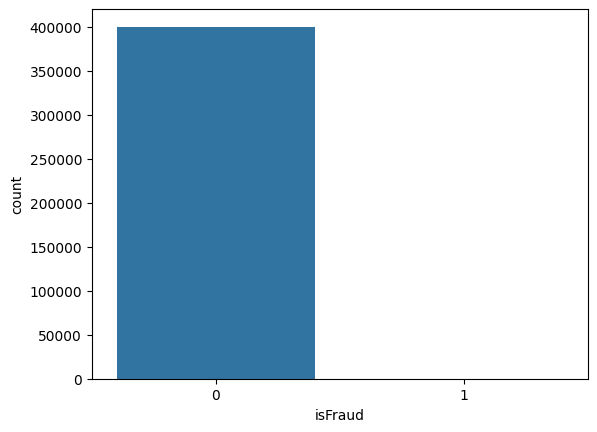

In [17]:
print (df.shape)
display (df)
print ("number of Nan values ",df.isna().sum().sum())
print ("fraud proportion",df["isFraud"].value_counts(normalize=True)*100)
fraud = (df["isFraud"].value_counts(normalize=True)*100)[1]
print ("fraud issue %", fraud)
sns.countplot(data=df,x="isFraud")


In [ ]:
# display (df)
# # scale data
# df['amount'] = StandardScaler().fit_transform(df['amount'].values.reshape(-1,1))
# df['oldbalanceOrg'] = StandardScaler().fit_transform(df['oldbalanceOrg'].values.reshape(-1,1))
# df['newbalanceOrig'] = StandardScaler().fit_transform(df['newbalanceOrig'].values.reshape(-1,1))
# df['oldbalanceDest'] = StandardScaler().fit_transform(df['oldbalanceDest'].values.reshape(-1,1))
# df['newbalanceDest'] = StandardScaler().fit_transform(df['newbalanceDest'].values.reshape(-1,1))
# display (df)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
18,PAYMENT,23418.59,C614454039,165.00,0.00,M2054593336,0.0,0.00,0,0
18,CASH_OUT,7238.40,C627472845,25561.00,18322.60,C1760562417,3168.0,10406.40,0,0
18,CASH_IN,67545.15,C822021693,10594.00,78139.15,C729942809,0.0,62937.59,0,0


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,-0.569356,C1231006815,-0.250128,-0.256832,M1979787155,-0.418134,-0.463169,0,0
1,PAYMENT,-0.597229,C1666544295,-0.299878,-0.303336,M2044282225,-0.418134,-0.463169,0,0
1,TRANSFER,-0.603112,C1305486145,-0.306917,-0.309733,C553264065,-0.418134,-0.463169,1,0
1,CASH_OUT,-0.603112,C840083671,-0.306917,-0.309733,C38997010,-0.409148,-0.463169,1,0
1,PAYMENT,-0.562966,C2048537720,-0.293093,-0.299870,M1230701703,-0.418134,-0.463169,0,0
...,...,...,...,...,...,...,...,...,...,...
18,PAYMENT,-0.521899,C614454039,-0.306923,-0.309733,M2054593336,-0.418134,-0.463169,0,0
18,CASH_OUT,-0.578447,C627472845,-0.298437,-0.303686,C1760562417,-0.416790,-0.459089,0,0
18,CASH_IN,-0.367682,C822021693,-0.303438,-0.283946,C729942809,-0.418134,-0.438496,0,0


In [19]:
print (df.dtypes)

# create variables
y = df ["isFraud"]
# remove string variables
X = df.drop(columns=["isFraud","type","nameOrig","nameDest","isFlaggedFraud"])

# split data
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=.2,random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


,mean_test_score,std_test_score,params
1,0.999494,0.000027,"{'metric': 'minkowski', 'n_neighbors': 2}"
3,0.999487,0.000025,"{'metric': 'minkowski', 'n_neighbors': 4}"
2,0.999484,0.000038,"{'metric': 'minkowski', 'n_neighbors': 3}"
4,0.999484,0.000029,"{'metric': 'minkowski', 'n_neighbors': 5}"
5,0.999481,0.000021,"{'metric': 'minkowski', 'n_neighbors': 6}"


KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)
{'metric': 'minkowski', 'n_neighbors': 2}

EllipticEnvelope best estimator

EllipticEnvelope Classification Report:
              precision    recall  f1-score   support

  Normal (1)       1.00      1.00      1.00     79961
Anomaly (-1)       0.80      0.10      0.18        39

    accuracy                           1.00     80000
   macro avg       0.90      0.55      0.59     80000
weighted avg       1.00      1.00      1.00     80000


 EllipticEnvelope Confusion Matrix:
[[79960     1]
 [   35     4]]


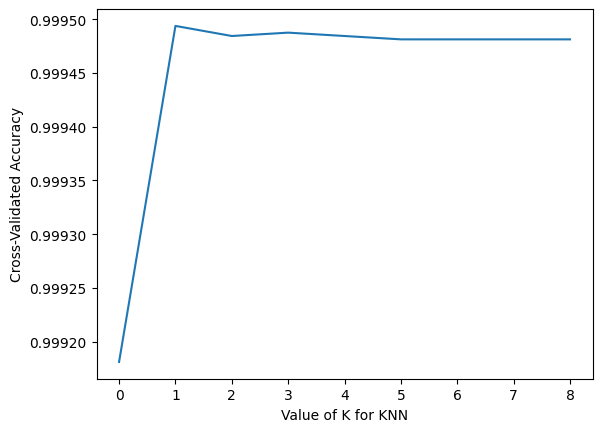

In [ ]:
from sklearn.model_selection import GridSearchCV

# kneighbour classifier
k_neighbour = KNeighborsClassifier(algorithm="kd_tree",n_jobs=-1)

n_neighbors = list(range(1, 10))

param_grid = {"metric" : ["minkowski"],"n_neighbors" : n_neighbors}
grid_search = GridSearchCV (estimator=k_neighbour,param_grid=param_grid,cv=10,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train_scaled,y_train.ravel())

results_knn= pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
display(results_knn.sort_values("mean_test_score",ascending=False).head(5))

print (grid_search.best_estimator_)
print (grid_search.best_params_)

# Get the best model
print("\n KNeighborsClassifier best estimator")
best_model = grid_search.best_estimator_

# Make predictions on test set
y_pred_test = best_model.predict(X_test_scaled)



# Classification report
print("\n lliptKNeighborsClassifiericEnvelope Classification Report:")
print(classification_report(y_test, y_pred_test, 
                          target_names=['Normal (1)', 'Anomaly (-1)']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("\n KNeighborsClassifier Confusion Matrix:")
print(cm)



grid_mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot( grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.show()

In [31]:
# Insérer votre code ici
from sklearn.covariance import EllipticEnvelope 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, average_precision_score, roc_auc_score
from sklearn.metrics import matthews_corrcoef


import warnings


param_grid = {
    'contamination': [0.1,0.2],  # Expected proportion of outliers
    'support_fraction': [0.8]  # Proportion of points to compute covariance
}


#  robust covariance
el = EllipticEnvelope(random_state=42)

print("\nStarting GridSearchCV...")
grid_search = GridSearchCV(
    estimator=el,
    param_grid=param_grid,
    scoring="accuracy",  # Custom scoring for anomaly detection
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print (grid_search.best_estimator_)
print (grid_search.best_params_)

print("\nEllipticEnvelope best parameters")
print(f"\nBest parameters: {grid_search.best_params_}")

# Get the best model
print("\nEllipticEnvelope best estimator")
best_model = grid_search.best_estimator_

# Make predictions on test set
y_pred_test = best_model.predict(X_test_scaled)



# Classification report
print("\nEllipticEnvelope Classification Report:")
print(classification_report(y_test, y_pred_test, 
                          target_names=['Normal (1)', 'Anomaly (-1)',"0ther "]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("\n EllipticEnvelope Confusion Matrix:")
print(cm)




Starting GridSearchCV...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ............contamination=0.2, support_fraction=0.8; total time=  38.4s
[CV] END ............contamination=0.1, support_fraction=0.8; total time=  38.8s
[CV] END ............contamination=0.1, support_fraction=0.8; total time=  40.5s
[CV] END ............contamination=0.1, support_fraction=0.8; total time=  44.7s
[CV] END ............contamination=0.1, support_fraction=0.8; total time=  46.6s
[CV] END ............contamination=0.1, support_fraction=0.8; total time=  58.9s
[CV] END ............contamination=0.2, support_fraction=0.8; total time=  42.4s
[CV] END ............contamination=0.2, support_fraction=0.8; total time=  44.3s
[CV] END ............contamination=0.2, support_fraction=0.8; total time=  44.1s
[CV] END ............contamination=0.2, support_fraction=0.8; total time=  55.3s
EllipticEnvelope(random_state=42, support_fraction=0.8)
{'contamination': 0.1, 'support_fraction': 0.8}


In [34]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

# lof
lof = LocalOutlierFactor (n_neighbors=10, algorithm='auto', metric='euclidean', contamination=0.002)
y_pred_lof = lof.fit_predict(X_train)

# shift values
y_pred_lof [y_pred_lof == 1] = 0
y_pred_lof [y_pred_lof == -1] = 1

n_errors = (y_pred_lof !=y_train).sum()
print ("nerrors",n_errors)

print ("lof model accuracy" , accuracy_score(y_train,y_pred_lof))
print ("lof classification report" , classification_report(y_train,y_pred_lof))

print ("precision_score" , precision_score(y_train,y_pred_lof))
print ("matthews_corrcoef" , matthews_corrcoef(y_train,y_pred_lof))
print ("f1 score" , f1_score(y_train,y_pred_lof))
print ("recall_score" , recall_score(y_train,y_pred_lof))
print ("roc_auc_score" , roc_auc_score(y_train,y_pred_lof))

confusion_matrix (y_train,y_pred_lof)

nerrors 803
lof model accuracy 0.9974906171581787
lof classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    319832
           1       0.00      0.01      0.00       167

    accuracy                           1.00    319999
   macro avg       0.50      0.50      0.50    319999
weighted avg       1.00      1.00      1.00    319999

precision_score 0.003125
matthews_corrcoef 0.005102400997313596
f1 score 0.004956629491945477
recall_score 0.011976047904191617
roc_auc_score 0.5049906253178128


array([[319194,    638],
       [   165,      2]])

In [35]:
from sklearn.cluster import DBSCAN

# dbScan

dbscan = DBSCAN(eps = 0.4, min_samples = 15)

dbscan.fit(X_train)

y_pred_dbscan = dbscan.labels_

y_pred_dbscan[y_pred_dbscan == -1] = 1
y_pred_dbscan[y_pred_dbscan != -1 ] = 0

print ("dbscan accuracy score", accuracy_score (y_train,y_pred_dbscan))
print ("dbscan classification_report", classification_report (y_train,y_pred_dbscan))

print ("dbscan confusion matrix", confusion_matrix (y_train,y_pred_dbscan))
print ("dbscan roc auc score", roc_auc_score (y_train,y_pred_dbscan))
print ("dbscan matthews_corrcoef", matthews_corrcoef (y_train,y_pred_dbscan))

: 

: 